In [152]:
import pandas as pd
import seaborn as sns
import random
import string
import warnings
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from wordcloud import WordCloud
from tqdm import tqdm_notebook
import re

from collections import Counter 

In [210]:
tweets = pd.read_excel("/Users/arjunanandapadmanabhan/Downloads/Tweets.xlsx")

In [211]:
predictions = pd.read_csv("/Users/arjunanandapadmanabhan/Downloads/predictions.csv")

In [212]:
final = tweets.merge(predictions, on=['Date', 'Content'], how='left')

In [171]:
final

,UserID,Phrase_x,Date,Tweet ID_x,Content,Username_x,Location_x,Place_x,Coordinates_x,Verified_x,...,Tweet ID_y,Username_y,Location_y,Place_y,Coordinates_y,Verified_y,FollowerCount_y,retweetCount_y,Language_y,Labels
0,130,vaccinate,2020-03-04 23:44:39+00:00,1235350475932750080,This is simply a sobering reminder that we sho...,LizSpecht,"San Francisco, CA",NaN,NaN,False,...,1.240000e+18,LizSpecht,"California, United States",NaN,NaN,False,51255.0,1.0,en,Negative
1,429,vaccines,2020-03-11 23:59:24+00:00,1237890903508839936,@jonfavs Remember the polio vaccine days of th...,LIRNResist,"San Francisco, CA",NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,609,vaccines,2020-03-15 23:59:53+00:00,1239340572696960000,This is precisely the wrong thing to be doing!...,MartyMacGyver,"San Francisco, CA","Place(fullName='San Francisco, CA', name='San ...","Coordinates(longitude=-122.514926, latitude=37...",False,...,1.240000e+18,MartyMacGyver,"California, United States","Place(fullName='San Francisco, CA', name='San ...","Coordinates(longitude=-122.514926, latitude=37...",False,353.0,0.0,en,Positive
3,809,COVIDVaccine,2020-03-21 22:25:50+00:00,1241491234964679936,kurlyfryz: fluffmugger: jbt7493: briearesea: m...,decourseydave,"San Francisco, CA",NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,878,vaccinate,2020-03-22 23:38:38+00:00,1241871940979059968,@LDcbythesea @handmadekathy @declanoscanlon Yo...,doritmi,"San Francisco, CA","Place(fullName='Fremont, CA', name='Fremont', ...","Coordinates(longitude=-122.069956, latitude=37...",True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2382,219549,Covidvaccine,2021-08-17 23:52:21+00:00,1427780368640399872,Some Michigan parents reportedly lying about t...,DetroitSteel_,"Detroit, MI",NaN,NaN,False,...,1.430000e+18,DetroitSteel_,"Michigan, United States",NaN,NaN,False,19402.0,0.0,en,Neutral
2383,220999,Covidvaccine,2021-12-02 23:51:26+00:00,1466555641946840064,"This is a very old antivax trope, comparing va...",gorskon,"Detroit, MI",NaN,NaN,True,...,1.470000e+18,gorskon,"Michigan, United States",NaN,NaN,True,70038.0,10.0,en,Positive
2384,221338,Covidvaccine,2022-01-05 23:51:03+00:00,1478876732463660032,Blue Cross Blue Shield Of Michigan Facing Poss...,CBSDetroit,"Detroit, MI",NaN,NaN,True,...,1.480000e+18,CBSDetroit,"Michigan, United States",NaN,NaN,True,38985.0,1.0,en,Neutral
2385,221991,Covidvaccine,2022-03-11 23:33:40+00:00,1502427569332829952,@NickBuckleyMBE They are urging all world gove...,BuccieroSandra,"Detroit, MI",NaN,NaN,False,...,1.500000e+18,BuccieroSandra,"Michigan, United States",NaN,NaN,False,325.0,2.0,en,Positive


In [205]:
final['Content'] = final['Content'].apply(lambda x: re.sub(r"https\S+", "", str(x)))
final['Content'] = final['Content'].apply(lambda x: re.sub(r"https\S+", "", str(x)))
final['Content'] = final['Content'].apply(lambda x: x.lower())
final['Content'] = final['Content'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [206]:
stop_words = set(stopwords.words('english'))
stop_words.update(['#coronavirus', '#coronavirusoutbreak', 
                   'covid''bayarea', 'vaccine', '#coronavirusPandemic', 
                   '#covid19', '#covid_19', '#epitwitter', '#ihavecorona', 
                   'amp', 'coronavirus', 'covid19', 'vaccinatetheworld', 'puddlejumper358', 'markhoofnagle',
                  'elfel1', 'theeliklein', 'antivaxxers'])

final['Content']  =final['Content'] .apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [207]:
data_sf_positive = final[(final['Location_x'] == 'San Francisco, CA') & (final['Labels'] == 'Positive')]

In [208]:
word_list_sf_positive = [word for line in data_sf_positive['Content'] for word in line.split()]

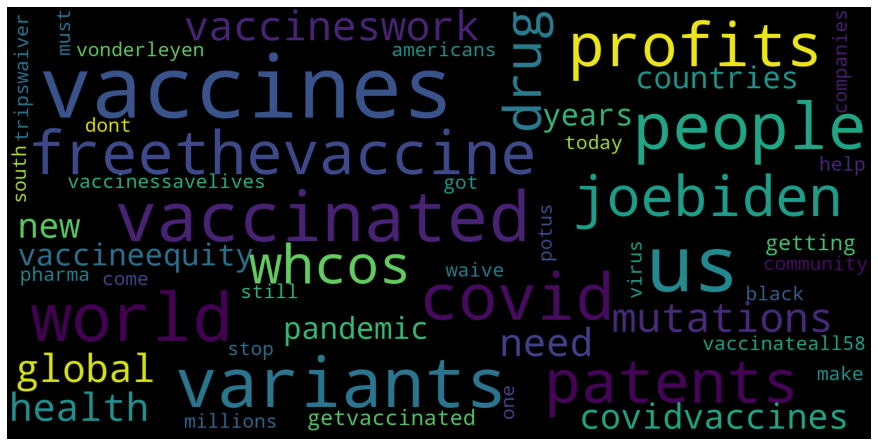

In [209]:
wordcloud = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(word_list_sf_positive))


plt.figure(figsize = (12, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

In [135]:
data_sf_negative = final[(final['Location_x'] == 'San Francisco, CA') & (final['Labels'] == 'Negative')]

In [136]:
word_list_sf_negative = [word for line in data_sf_negative ['Content'] for word in line.split()]

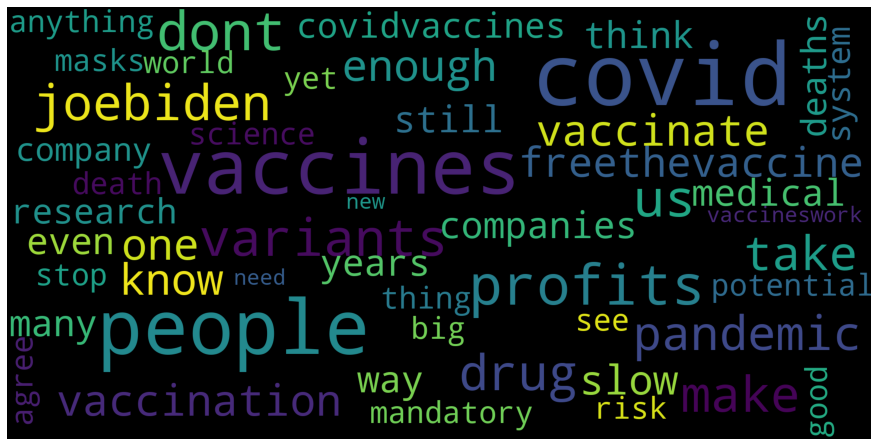

In [137]:
wordcloud = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(word_list_sf_negative))


plt.figure(figsize = (12, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

In [138]:
data_dt_negative = final[(final['Location_x'] == 'Detroit, MI') & (final['Labels'] == 'Negative')]

In [139]:
word_list_dt_negative = [word for line in data_dt_negative ['Content'] for word in line.split()]

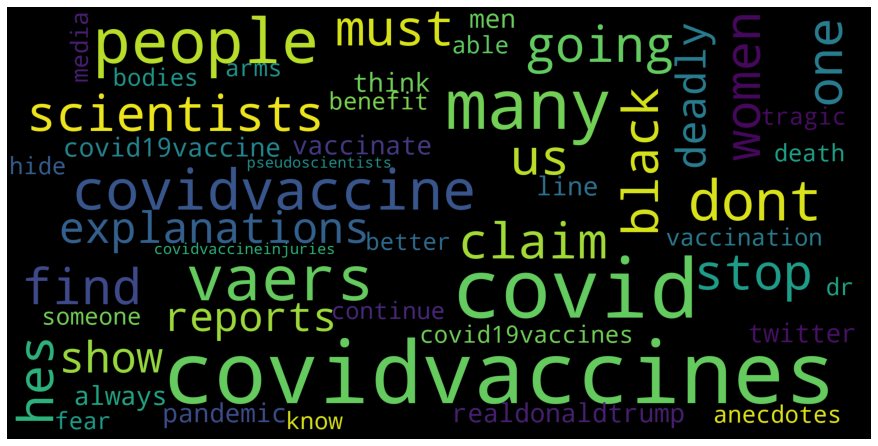

In [140]:
wordcloud = WordCloud(
    background_color='Black',
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(word_list_dt_negative))


plt.figure(figsize = (12, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

In [141]:
data_dt_positive = final[(final['Location_x'] == 'Detroit, MI') & (final['Labels'] == 'Positive')]

In [142]:
word_list_dt_positive = [word for line in data_dt_positive ['Content'] for word in line.split()]

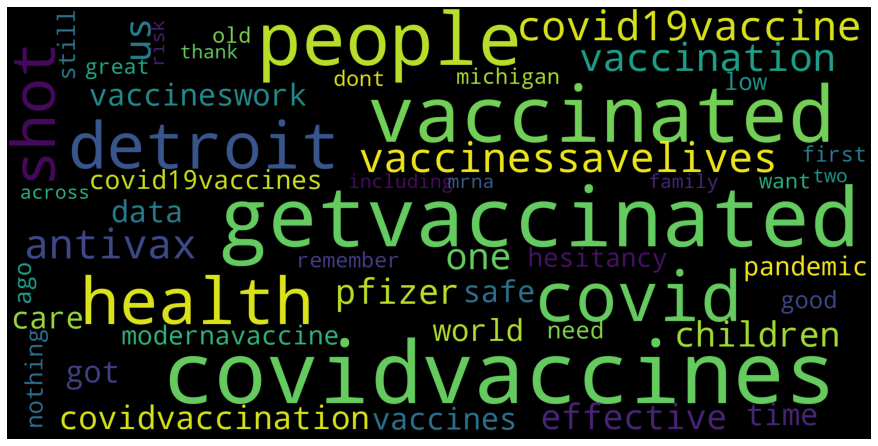

In [143]:
wordcloud = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(word_list_dt_positive))


plt.figure(figsize = (12, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)